# building 1-36 데이터 준비

- # 건물기타 15개, 공공 8개, 대학교 8개, 데이터센터 5개

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임다시시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (32.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120828 files and direc

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
 # NanumGothic 폰트의 경로로 변경해야 할 수도 있습니다.

# 폰트 이름 얻어오기
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()

# 폰트 설정하기
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


In [4]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = '/content/drive/MyDrive/데이콘 캐글 컴페티션/DACON_23.07_PowerConsumption/'
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
train = pd.read_csv(f"{DATA_PATH}train.csv")
test = pd.read_csv(f"{DATA_PATH}test.csv")
building = pd.read_csv(f"{DATA_PATH}building_info.csv")
submission = pd.read_csv(f"{DATA_PATH}sample_submission.csv")

In [6]:
building['건물유형'].value_counts()

건물기타       15
공공          8
대학교         8
백화점및아울렛     8
병원          8
상용          8
아파트         8
연구소         8
지식산업센터      8
할인마트        8
호텔및리조트      8
데이터센터       5
Name: 건물유형, dtype: int64

In [7]:
cols = ['건물번호','건물유형']
building[cols].iloc[:36]

,건물번호,건물유형
0,1,건물기타
1,2,건물기타
2,3,건물기타
3,4,건물기타
4,5,건물기타
5,6,건물기타
6,7,건물기타
7,8,건물기타
8,9,건물기타
9,10,건물기타


In [8]:
train_ft = pd.merge(train,building,on='건물번호',how='left')
train_ft

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,-,-,-
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,-,-,-
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,-,-,-
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,-,-,-
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,-,-,-
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,-,-,-
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-


In [9]:
test_ft = pd.merge(test,building,on='건물번호',how='left')
test_ft

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,건물기타,110634.00,39570.00,-,-,-
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,건물기타,110634.00,39570.00,-,-,-
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,건물기타,110634.00,39570.00,-,-,-
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,건물기타,110634.00,39570.00,-,-,-
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84,호텔및리조트,57497.84,40035.23,-,-,-
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95,호텔및리조트,57497.84,40035.23,-,-,-
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98,호텔및리조트,57497.84,40035.23,-,-,-
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97,호텔및리조트,57497.84,40035.23,-,-,-


In [10]:
train_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      204000 non-null  object 
 14  ESS저장용량(kWh)   204000 non-null  object 
 15  PCS용량(kW)      204000 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 26.5+ MB


In [11]:
train_ft.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '건물유형', '연면적(m2)', '냉방면적(m2)',
       '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'],
      dtype='object')

In [12]:
test_ft.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')

- object 칼럼 처리:  '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'

In [13]:
train_ft['태양광용량(kW)'] = train_ft['태양광용량(kW)'].replace('-', np.nan).astype(float)
train_ft['ESS저장용량(kWh)'] = train_ft['ESS저장용량(kWh)'].replace('-', np.nan).astype(float)
train_ft['PCS용량(kW)'] = train_ft['PCS용량(kW)'].replace('-', np.nan).astype(float)

In [14]:
train_ft

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.00,39570.00,NaN,NaN,NaN
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.00,39570.00,NaN,NaN,NaN
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.00,39570.00,NaN,NaN,NaN
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.00,39570.00,NaN,NaN,NaN
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.00,39570.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,NaN,NaN,NaN
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,NaN,NaN,NaN
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,NaN,NaN,NaN
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,NaN,NaN,NaN


In [15]:
train_ft.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
건물유형                  0
연면적(m2)               0
냉방면적(m2)              0
태양광용량(kW)        130560
ESS저장용량(kWh)     193800
PCS용량(kW)        193800
dtype: int64

- object 칼럼 처리 : 'num_date_time'제거 , '일시' to datetime

In [16]:
train_ft['일시'] = pd.to_datetime(train_ft['일시'])

# 월, 일, 시간 추출하여 새로운 칼럼 추가
train_ft['월'] = train_ft['일시'].dt.month
train_ft['일'] = train_ft['일시'].dt.day
train_ft['시간'] = train_ft['일시'].dt.hour

# 요일 추출하여 새로운 칼럼 추가 (월요일: 0, 일요일: 6)
train_ft['요일'] = train_ft['일시'].dt.weekday

#일자번호 추가
train_ft['일자번호'] = train_ft['일시'].dt.dayofyear

#주간번호 추가
train_ft['주간번호'] = train_ft['일시'].dt.isocalendar().week


In [17]:
test_ft['일시'] = pd.to_datetime(train_ft['일시'])

# 월, 일, 시간 추출하여 새로운 칼럼 추가
test_ft['월'] = test_ft['일시'].dt.month
test_ft['일'] = test_ft['일시'].dt.day
test_ft['시간'] = test_ft['일시'].dt.hour

# 요일 추출하여 새로운 칼럼 추가 (월요일: 0, 일요일: 6)
test_ft['요일'] = test_ft['일시'].dt.weekday

#일자번호 추가
test_ft['일자번호'] = test_ft['일시'].dt.dayofyear

#주간번호 추가
test_ft['주간번호'] = test_ft['일시'].dt.isocalendar().week


In [18]:
train_ft = train_ft.drop('num_date_time', axis=1)
test_ft = test_ft.drop('num_date_time', axis=1)


- 데이터 칼럼 영문화

In [19]:
train_ft.columns

Index(['건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)',
       '일사(MJ/m2)', '전력소비량(kWh)', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)',
       'ESS저장용량(kWh)', 'PCS용량(kW)', '월', '일', '시간', '요일', '일자번호', '주간번호'],
      dtype='object')

In [20]:
test_ft.columns

Index(['건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '건물유형', '연면적(m2)',
       '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', '월', '일', '시간',
       '요일', '일자번호', '주간번호'],
      dtype='object')

In [21]:
english_columns = ['building_number', 'datetime', 'temperature_C', 'precipitation_mm', 'wind_speed_m_s',
                   'humidity_percent', 'sunshine_hr', 'solar_radiation_MJ_m2', 'energy_consumption_kWh',
                   'building_type', 'gross_floor_area_m2', 'cooling_area_m2', 'solar_capacity_kW',
                   'ESS_storage_capacity_kWh', 'PCS_capacity_kW', 'month', 'day', 'hour', 'day_of_week', 'date_number']

In [22]:
# 변수 영문명으로 변경
train_eng_cols = ['building_num', 'date_time', 'temp', 'precip', 'wind_ms', 'humidity', 'sunshine',
                  'solar_rad', 'energy_consum', 'building_type', 'floor_area', 'cooling_area', 'solar_capa',
                  'ess_capa','pcs_capa','month','day','hour','day_of_week','day_of_year', 'week_of_year']

train_ft.columns = train_eng_cols
# test_df.columns = test_eng_cols

In [23]:
test_eng_cols = ['building_num', 'date_time', 'temp', 'precip', 'wind_ms', 'humidity','building_type', 'floor_area',
                 'cooling_area', 'solar_capa', 'ess_capa','pcs_capa','month','day','hour',
                 'day_of_week','day_of_year', 'week_of_year']

test_ft.columns = test_eng_cols

### 건물 번호별 df 정의

In [24]:
#train_ft

# 1부터 36까지의 숫자에 따라 train_ft 데이터프레임을 생성하여 개별 변수로 저장
for i in range(1, 37):
    globals()[f'train_df_{i}'] = train_ft[train_ft['building_num'] == i]

In [25]:
#test_ft

# 1부터 36까지의 숫자에 따라 train_ft 데이터프레임을 생성하여 개별 변수로 저장
for i in range(1, 37):
    globals()[f'test_df_{i}'] = test_ft[test_ft['building_num'] == i]

- df별로 모든 값이 결측치인 칼럼은 제거하기

In [26]:
train_df_1.isnull().sum()

building_num        0
date_time           0
temp                0
precip           1539
wind_ms             0
humidity            0
sunshine          767
solar_rad         767
energy_consum       0
building_type       0
floor_area          0
cooling_area        0
solar_capa       2040
ess_capa         2040
pcs_capa         2040
month               0
day                 0
hour                0
day_of_week         0
day_of_year         0
week_of_year        0
dtype: int64

In [27]:
def remove_nan_cols(dataframe):
    columns_to_keep = [col for col in dataframe.columns if not dataframe[col].isnull().all()]
    columns_to_drop = [col for col in dataframe.columns if dataframe[col].isnull().all()]
    return dataframe[columns_to_keep]

- df 별 칼럼 수, 제거된 칼럼 확인

In [28]:
#train데이터

for i in range(1, 37):
    columns_to_drop = [col for col in globals()[f'train_df_{i}'].columns if globals()[f'train_df_{i}'][col].isnull().all()]
    globals()[f'train_df_{i}'] = remove_nan_cols(globals()[f'train_df_{i}'])
    columns_count = len(globals()[f'train_df_{i}'].columns)  # 현재 데이터프레임의 칼럼 수 계산
    print(f'{i}번 - {columns_count}, {columns_to_drop} 제거 ')


1번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
2번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
3번 - 19, ['ess_capa', 'pcs_capa'] 제거 
4번 - 19, ['ess_capa', 'pcs_capa'] 제거 
5번 - 20, ['solar_capa'] 제거 
6번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
7번 - 20, ['solar_capa'] 제거 
8번 - 17, ['solar_rad', 'solar_capa', 'ess_capa', 'pcs_capa'] 제거 
9번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
10번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
11번 - 18, ['solar_rad', 'ess_capa', 'pcs_capa'] 제거 
12번 - 19, ['ess_capa', 'pcs_capa'] 제거 
13번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
14번 - 19, ['ess_capa', 'pcs_capa'] 제거 
15번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
16번 - 19, ['ess_capa', 'pcs_capa'] 제거 
17번 - 18, ['solar_capa', 'ess_capa', 'pcs_capa'] 제거 
18번 - 19, ['ess_capa', 'pcs_capa'] 제거 
19번 - 20, ['solar_capa'] 제거 
20번 - 17, ['solar_rad', 'solar_capa', 'ess_capa', 'pcs_capa'] 제거 
21번 - 21, [] 제거 
22번 - 19, ['ess_capa', 'pcs_capa'] 제거 
23번 - 18, ['solar_capa',

In [29]:
#test 데이터

for i in range(1, 37):
    columns_to_drop = [col for col in globals()[f'test_df_{i}'].columns if globals()[f'test_df_{i}'][col].isnull().all()]
    globals()[f'test_df_{i}'] = remove_nan_cols(globals()[f'test_df_{i}'])
    columns_count = len(globals()[f'test_df_{i}'].columns)  # 현재 데이터프레임의 칼럼 수 계산
    print(f'{i}번 - {columns_count} ')

1번 - 18 
2번 - 18 
3번 - 18 
4번 - 18 
5번 - 18 
6번 - 18 
7번 - 18 
8번 - 18 
9번 - 18 
10번 - 18 
11번 - 18 
12번 - 18 
13번 - 18 
14번 - 18 
15번 - 18 
16번 - 18 
17번 - 18 
18번 - 18 
19번 - 18 
20번 - 18 
21번 - 18 
22번 - 18 
23번 - 18 
24번 - 18 
25번 - 18 
26번 - 18 
27번 - 18 
28번 - 18 
29번 - 18 
30번 - 18 
31번 - 18 
32번 - 18 
33번 - 18 
34번 - 18 
35번 - 18 
36번 - 18 


# 건물기타 : 1-15번

In [30]:
mask = train_ft['building_type'] == '건물기타'
train_df_etc = train_ft[mask]

In [31]:
train_df_etc

,building_num,date_time,temp,precip,wind_ms,humidity,sunshine,solar_rad,energy_consum,building_type,...,cooling_area,solar_capa,ess_capa,pcs_capa,month,day,hour,day_of_week,day_of_year,week_of_year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,...,39570.00,NaN,NaN,NaN,6,1,0,2,152,22
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,...,39570.00,NaN,NaN,NaN,6,1,1,2,152,22
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,...,39570.00,NaN,NaN,NaN,6,1,2,2,152,22
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,...,39570.00,NaN,NaN,NaN,6,1,3,2,152,22
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,...,39570.00,NaN,NaN,NaN,6,1,4,2,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,15,2022-08-24 19:00:00,21.7,NaN,1.6,91.0,0.0,0.16,1819.44,건물기타,...,167012.31,NaN,NaN,NaN,8,24,19,2,236,34
30596,15,2022-08-24 20:00:00,21.8,NaN,1.7,92.0,0.0,0.00,1918.17,건물기타,...,167012.31,NaN,NaN,NaN,8,24,20,2,236,34
30597,15,2022-08-24 21:00:00,21.4,NaN,1.1,92.0,NaN,NaN,1999.53,건물기타,...,167012.31,NaN,NaN,NaN,8,24,21,2,236,34
30598,15,2022-08-24 22:00:00,21.4,NaN,0.3,92.0,NaN,NaN,2043.63,건물기타,...,167012.31,NaN,NaN,NaN,8,24,22,2,236,34


## 1번 (기준)

### EDA
- energy_consumption과 groupby하여 피처별로 타겟값과 관계 확인, 패턴 있는 경우 train_ft에 공통 피처로 추가함

In [32]:
train_df_1

,building_num,date_time,temp,precip,wind_ms,humidity,sunshine,solar_rad,energy_consum,building_type,floor_area,cooling_area,month,day,hour,day_of_week,day_of_year,week_of_year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,6,1,0,2,152,22
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,6,1,1,2,152,22
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,6,1,2,2,152,22
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,6,1,3,2,152,22
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,6,1,4,2,152,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1,2022-08-24 19:00:00,25.5,NaN,2.9,63.0,0.1,0.19,2517.12,건물기타,110634.0,39570.0,8,24,19,2,236,34
2036,1,2022-08-24 20:00:00,25.0,NaN,2.6,66.0,0.0,0.01,2208.96,건물기타,110634.0,39570.0,8,24,20,2,236,34
2037,1,2022-08-24 21:00:00,24.6,NaN,1.3,67.0,NaN,NaN,1806.24,건물기타,110634.0,39570.0,8,24,21,2,236,34
2038,1,2022-08-24 22:00:00,24.1,NaN,2.1,70.0,NaN,NaN,1387.20,건물기타,110634.0,39570.0,8,24,22,2,236,34


#### 시간 feature

- Time Series Decomposition

In [33]:
tmp = train_df_1.groupby('date_time')['energy_consum'].mean()
tmp = pd.DataFrame(tmp).reset_index()

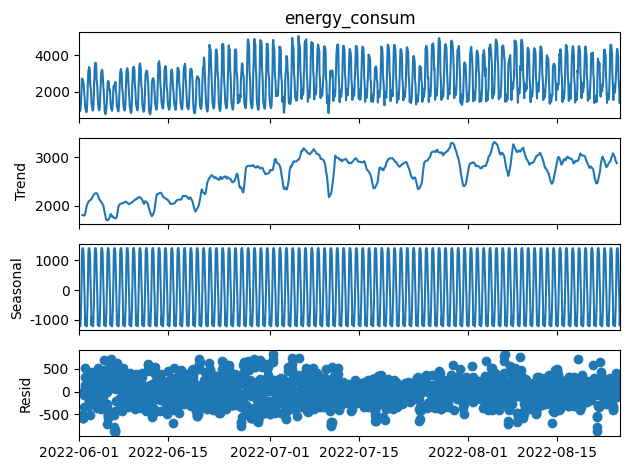

In [34]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# tmp 데이터프레임에서 '일시' 열을 날짜형으로 변환
# tmp['일시'] = pd.to_datetime(tmp['일시'])

# 시계열 데이터로 변환하여 인덱스 설정
tmp.set_index('date_time', inplace=True)

# 시계열 분해
result = seasonal_decompose(tmp['energy_consum'], model='additive')

# 시계열 분해 결과 시각화
# plt.figure(figsize=(16,8))
result.plot()
plt.show()

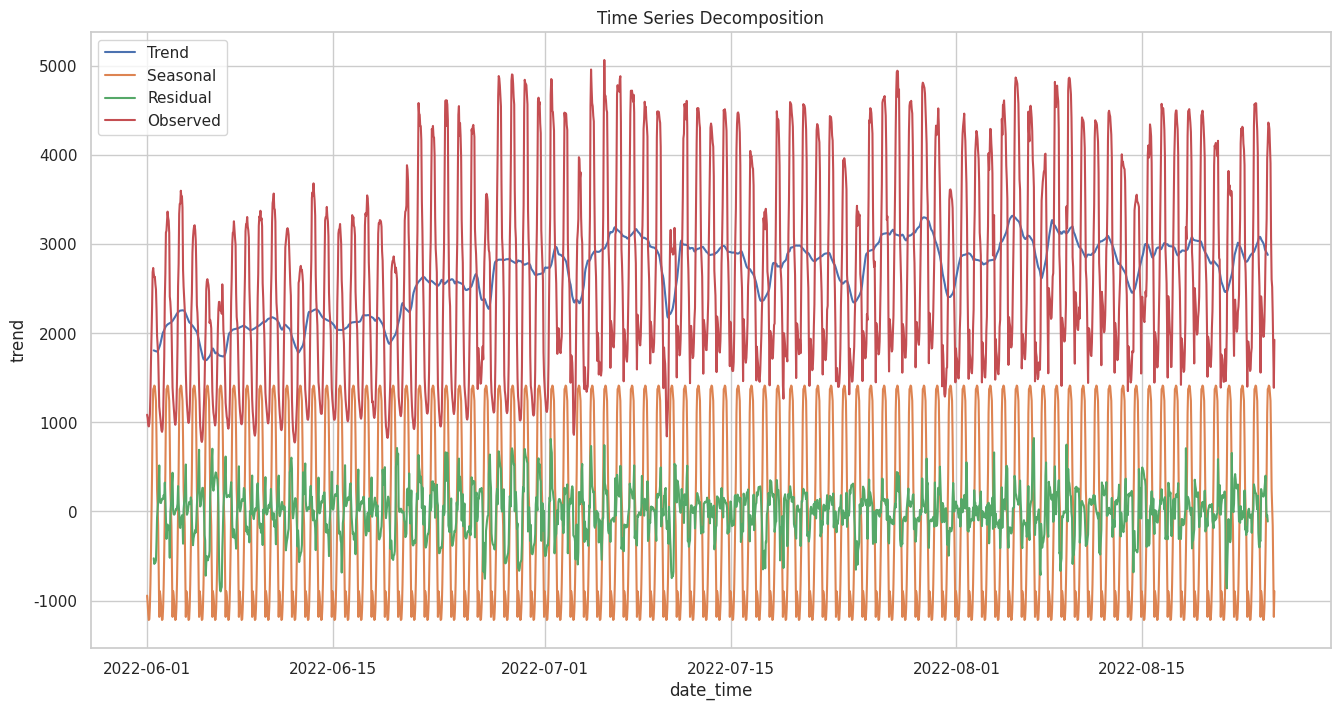

In [35]:
tmp = train_df_1.groupby('date_time')['energy_consum'].mean()
tmp = pd.DataFrame(tmp).reset_index()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# tmp 데이터프레임에서 '일시' 열을 날짜형으로 변환
tmp['date_time'] = pd.to_datetime(tmp['date_time'])

# 시계열 데이터로 변환하여 인덱스 설정
tmp.set_index('date_time', inplace=True)

# 시계열 분해
result = seasonal_decompose(tmp['energy_consum'], model='additive') # model은 additive or multiplicative

# seaborn 스타일 설정
sns.set(style="whitegrid")

# 시계열 분해 결과 시각화
plt.figure(figsize=(16, 8))
sns.lineplot(data=result.trend, label='Trend')
sns.lineplot(data=result.seasonal, label='Seasonal')
sns.lineplot(data=result.resid, label='Residual')
sns.lineplot(data=result.observed, label='Observed')
plt.legend()
plt.title('Time Series Decomposition')
plt.show()


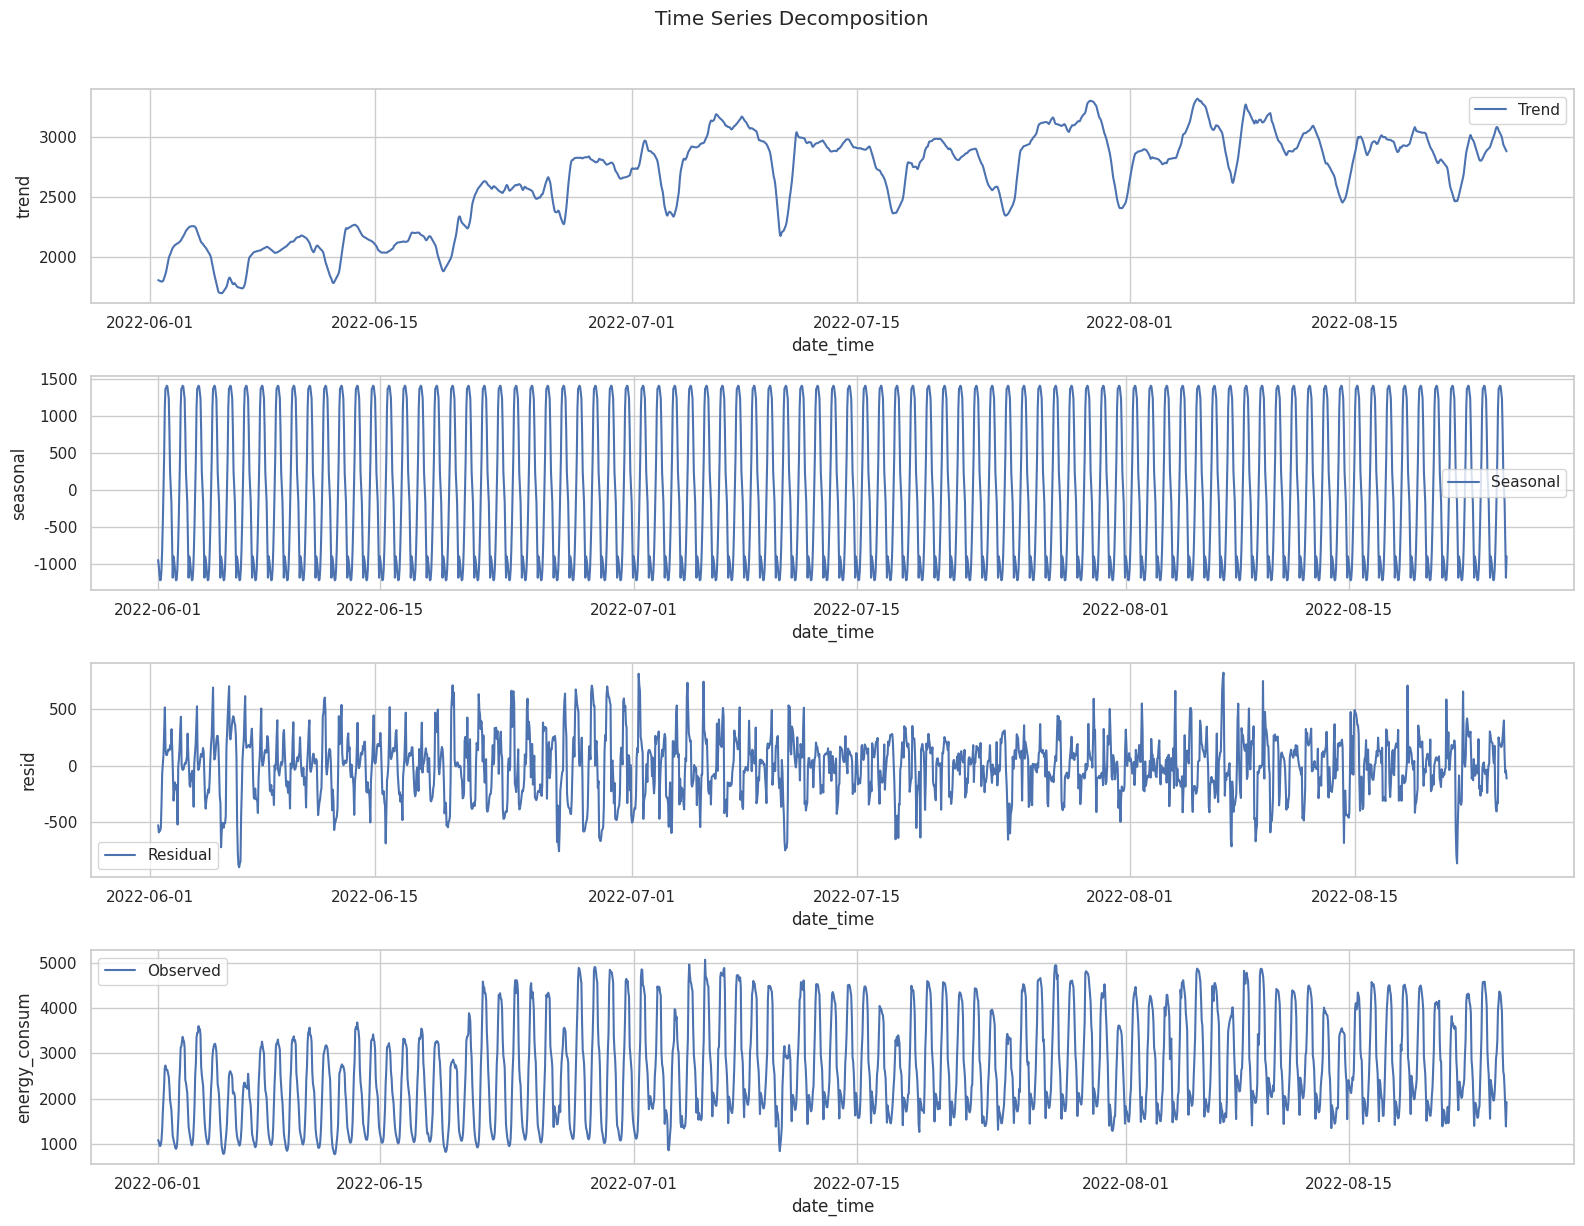

In [36]:
plt.figure(figsize=(16, 12))

# Trend subplot
plt.subplot(4, 1, 1)
sns.lineplot(data=result.trend, label='Trend')
plt.legend()

# Seasonal subplot
plt.subplot(4, 1, 2)
sns.lineplot(data=result.seasonal, label='Seasonal')
plt.legend()

# Residual subplot
plt.subplot(4, 1, 3)
sns.lineplot(data=result.resid, label='Residual')
plt.legend()

# Observed subplot
plt.subplot(4, 1, 4)
sns.lineplot(data=result.observed, label='Observed')
plt.legend()

plt.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout()
plt.show()


In [37]:
# plt.figure(figsize=(16, 6))

# sns.set_palette("husl")

# stacked_data = pd.DataFrame({
#     'Trend': result.trend,
#     'Seasonal': result.seasonal,
#     'Residual': result.resid,
#     'Observed': result.observed
# })

# stacked_data.plot(kind='area')
# plt.title('Time Series Decomposition')
# plt.ylabel('Value')
# plt.show()


In [38]:
# plt.figure(figsize=(16, 6))

# sns.set_palette("husl")

# sns.lineplot(data=stacked_data, dashes=False)
# plt.title('Time Series Decomposition')
# plt.ylabel('Value')
# plt.show()


NameError: ignored

<Figure size 1600x600 with 0 Axes>

In [39]:
!pip install --upgrade statsmodels


In [ ]:
mean_power_by_day = train_df_1.groupby('day_of_year')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시계열 데이터 생성
# np.random.seed(0)
# dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
# values = np.sin(np.arange(365) * (2 * np.pi) / 365) + np.random.normal(0, 0.2, 365)
# data = pd.DataFrame({'Date': dates, 'Value': values})
# data.set_index('Date', inplace=True)

# 데이터 간 차이 계산
data['DailyDiff'] = data['Value'].diff()

# 데이터 간 차이 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DailyDiff'])
plt.xlabel('Date')
plt.ylabel('Daily Difference')
plt.title('Daily Difference of Values')
plt.show()


- 일자별 차이 분석 : dailiy difference

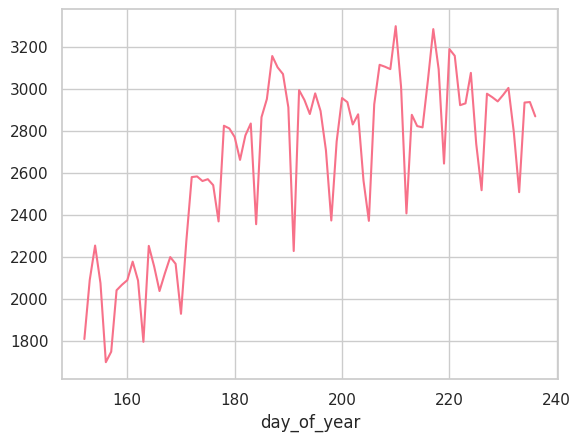

In [40]:
mean_power_by_day = train_df_1.groupby('day_of_year')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values)
plt.show()

- 요일별 차이 분석

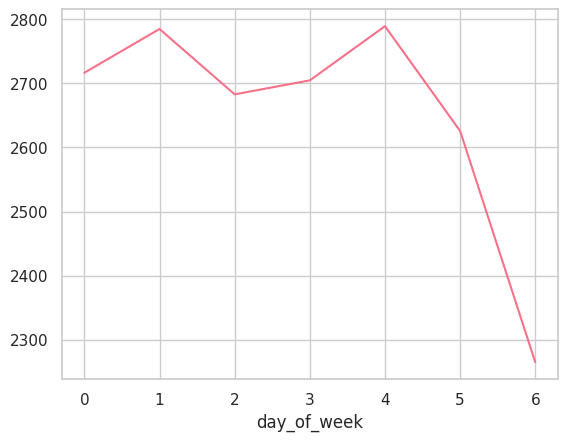

In [41]:
mean_power_by_day_of_week = train_df_1.groupby('day_of_week')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.show()

- 시간대별 차이 분석 : hourly difference

In [ ]:
mean_power_by_hour = train_df_1.groupby('hour')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values)
plt.show()

- 주간별 차이 분석

In [ ]:
mean_power_by_week_of_year = train_df_1.groupby('week_of_year')['energy_consum'].mean()

sns.lineplot(x=mean_power_by_week_of_year.index, y=mean_power_by_week_of_year.values)
plt.show()


- 월별 차이 분석

In [ ]:
mean_power_by_month = train_df_1.groupby('month')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1

#### 날씨 feature

In [ ]:
mean_power_by_month = train_df_1.groupby('temp')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
#강수량

mean_power_by_month = train_df_1.groupby('precip')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
mean_power_by_month = train_df_1.groupby('humidity')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
mean_power_by_month = train_df_1.groupby('sunshine')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
mean_power_by_month = train_df_1.groupby('solar_rad')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (데이터 프레임 생성 및 전처리 부분)

# 그래프를 그리기 위한 컬럼 리스트
columns_to_plot = ['solar_rad', 'sunshine', 'humidity', 'precip', 'temp']

# 한번에 그래프 그리기
plt.figure(figsize=(10, 6))  # 플롯 크기 설정

for column in columns_to_plot:
    mean_power_by_month = train_df_1.groupby(column)['energy_consum'].mean()
    sns.lineplot(x=mean_power_by_month.values, y=mean_power_by_month.index, label=column)  # x와 y를 바꿈

plt.xlabel('Y축 라벨')  # Y 축 라벨 설정
plt.ylabel('X축 라벨')  # X 축 라벨 설정
plt.title('다양한 그래프 겹쳐 그리기')  # 그래프 제목 설정
plt.legend()  # 범례 추가

plt.show()


In [ ]:
# 시간에 대한 cos, sin 피처 추가
train_df_1['cos_hour'] = np.cos(2 * np.pi * train_df_1['hour'] / 24)  # 하루 기준으로 cos 값 추가

mean_power_by_month = train_df_1.groupby('cos_hour')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['sin_hour'] = np.sin(2 * np.pi * train_df_1['hour'] / 24)  # 하루 기준으로 sin 값 추가

mean_power_by_month = train_df_1.groupby('sin_hour')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['cos_day_of_year'] = np.cos(2 * np.pi * train_df_1['day_of_year'] / 365)

mean_power_by_month = train_df_1.groupby('cos_day_of_year')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['sin_day_of_year'] = np.sin(2 * np.pi * train_df_1['day_of_year'] / 365)

mean_power_by_month = train_df_1.groupby('sin_day_of_year')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['cos_weekday'] = np.cos(2 * np.pi * train_df_1['day_of_week'] / 7)  # 7일 기준으로 cos 값 추가

mean_power_by_month = train_df_1.groupby('cos_weekday')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['sin_weekday'] = np.sin(2 * np.pi * train_df_1['day_of_week'] / 7)  # 7일 기준으로 sin 값 추가

mean_power_by_month = train_df_1.groupby('sin_weekday')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['cos_week'] = np.cos(2 * np.pi * train_df_1['day_of_year'] / 52)  # 52주 기준으로 cos 값 추가

mean_power_by_month = train_df_1.groupby('cos_week')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()


In [ ]:
train_df_1['sin_week'] = np.sin(2 * np.pi * train_df_1['day_of_year'] / 52)  # 52주 기준으로 sin 값 추가

mean_power_by_month = train_df_1.groupby('sin_week')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

In [ ]:
train_df_1['cos_month'] = np.cos(2 * np.pi * train_df_1['month'] / 12)  # 12달 기준으로 cos 값 추가

mean_power_by_month = train_df_1.groupby('cos_month')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()


In [ ]:
train_df_1['sin_month'] = np.sin(2 * np.pi * train_df_1['month'] / 12)  # 12달 기준으로 sin 값 추가

mean_power_by_month = train_df_1.groupby('sin_month')['energy_consum'].mean()
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values)
plt.show()

#### 건물 유형 feature

- 기온 관련 feature

### Feature 추가 / 제거

- 시간 관련

In [ ]:
# 시간에 대한 cos, sin 피처 추가
train_ft['cos_hour'] = np.cos(2 * np.pi * train_ft['hour'] / 24)  # 하루 기준으로 cos 값 추가
train_ft['sin_hour'] = np.sin(2 * np.pi * train_ft['hour'] / 24)  # 하루 기준으로 sin 값 추가

# 일에 대한 주기성을 감지하기 위한 피처 추가
train_ft['day_of_year'] = df['month'] * 30 + train_ft['day']  # 간단한 근사 값
train_ft['cos_day_of_year'] = np.cos(2 * np.pi * train_ft['day_of_year'] / 365)
train_ft['sin_day_of_year'] = np.sin(2 * np.pi * train_ft['day_of_year'] / 365)

# 요일에 대한 sin, cos 피처 추가
train_ft['cos_weekday'] = np.cos(2 * np.pi * train_ft['day_of_week'] / 7)  # 7일 기준으로 cos 값 추가
train_ft['sin_weekday'] = np.sin(2 * np.pi * train_ft['day_of_week'] / 7)  # 7일 기준으로 sin 값 추가

# 주차별 cos, sin 피처 추가
train_ft['cos_week'] = np.cos(2 * np.pi * train_ft['day_of_year'] / 52)  # 52주 기준으로 cos 값 추가
train_ft['sin_week'] = np.sin(2 * np.pi * train_ft['day_of_year'] / 52)  # 52주 기준으로 sin 값 추가

# 월에 대한 cos, sin 피처 추가
train_ft['cos_month'] = np.cos(2 * np.pi * train_ft['month'] / 12)  # 12달 기준으로 cos 값 추가
train_ft['sin_month'] = np.sin(2 * np.pi * train_ft['month'] / 12)  # 12달 기준으로 sin 값 추가



### 검증

In [ ]:
train_df_1.columns

In [ ]:
test_df_1.columns

In [ ]:
train_df_1

In [ ]:

cols = ['date_of_year','day_of_year']
train_df_1[cols]

In [ ]:
final_cols = [
    'month','cos_month', 'sin_month',
    'week_of_year','cos_week', 'sin_week',
    'day_of_week', 'cos_weekday', 'sin_weekday',
    'day', 'day_of_year','cos_day_of_year', 'sin_day_of_year',
    'hour', 'cos_hour', 'sin_hour',
    'temp', 'precip', 'wind_ms', 'humidity','sunshine', 'solar_rad', 'building_type', 'floor_area', 'cooling_area']

train_x = train_df_1[final_cols]
train_y = train_df_1['energy_consum']

# test_x = test_df_37.iloc[:,1:]

train_y

- 이상치 제거

In [ ]:
pip install auto-sklearn


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
!pip install --upgrade pip


In [ ]:
!pip install auto-sklearn==0.15.0


In [ ]:
import autosklearn


In [ ]:
공고


In [ ]:
import autosklearn.regression
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 로드 및 전처리
# train_df_37과 test_df_37에서 데이터를 가져오고 전처리하는 과정이 필요합니다.

# 학습 데이터와 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Auto-sklearn 설정 및 모델 생성 (feature_selection="auto")
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=3600,
    per_run_time_limit=300,
    ensemble_size=1,
    n_jobs=-1,
    feature_selection="auto"  # 자동 특징 선택 사용
)

# 모델 학습
automl.fit(X_train, y_train)

# 선택된 모델들과 해당 모델들의 가중치 가져오기
models_with_weights = automl.get_models_with_weights()

# 선택된 모델들의 특징 확인
selected_features = []
for model, weight in models_with_weights:
    selected_features.extend(model.configuration['exclude'])

print("Selected Features:", selected_features)


## 2번

*이탤릭체 텍스트*

# 공공 : 16-23번

# 대학교 : 24-31번

# 데이터센터 : 32-36번